In [2]:
%matplotlib inline
import time
import random
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from numpy import *
import matplotlib as mpl
import matplotlib.cm as cm
from sympy import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from scipy.optimize import OptimizeWarning
import seaborn as sns; import pandas as pd
import os, sys
from copy import deepcopy            # To completely copy lists and not references
from pandas import DataFrame, Series  # for convenience
#import cv2                           # OpenCV for video and image procedures
                                   # generating a folder or deleting files, etc.
import multiprocessing as mp         # This is for preventing large videos to take too much internal memory
import shutil                        # Deleting folders
plt.rcParams.update({'font.size': 14})
import matplotlib.cm as cm

## Maze creating

This is some stuff I did as a child with a pen on cross-section paper!
So I first decided for a pattern, like 3 strokes up (from the lower left corner to the upper right) and 2 strokes down (from the upper left corner to the lower right). Then I took a point in the center of the sheet of paper and start to draw that pattern anti-clockwise and repeat that. After some time mazes are created only depending on the initial pattern.

This simulation creates those patterns :)

In [5]:
size = 50
pattern = [0,0,0,1,1]

maze = np.zeros((size,size,2))
if size % 2 == 0: start = int(ceil(size/2))
else: start = int(floor(size/2))
maze[:,:,0] = 2

sizepattern = len(pattern)
check = True; count = 1; move = False
while check == True:
    if count == 1:
        x = start; y = start; dire = 2
        maze[x,y,0] = pattern[0]
        maze[x,y,1] = 1
        x -= 1
        maze[x,y,0] = pattern[1 % sizepattern]
        maze[x,y,1] = 2
        y -= 1
        maze[x,y,0] = pattern[2 % sizepattern]
        maze[x,y,1] = 3
        x += 1
        maze[x,y,0] = pattern[3 % sizepattern]
        maze[x,y,1] = 4
        
        count += 4
    #print('count = ',count,' - pos = (',x,',',y,') - dir = ',dire)
    if count > 1:
        if dire == 0:            
            if maze[x,y-1,1] == 0:              #Move up 
                dire += 1
                y -= 1
            else: x -= 1     
            move = True
        if dire == 1 and move == False:            
            if maze[x+1,y,1] == 0:             #Move left
                dire += 1 
                x += 1
            else: y -= 1     
            move = True
        if dire == 2 and move == False:
            if maze[x,y+1,1] == 0:             #Move down
                dire += 1   
                y += 1 
            else: x += 1     
            move = True
        if dire == 3 and move == False:            
            if maze[x-1,y,1] == 0:             #Move right
                dire = 0
                x -= 1
            else: y += 1     
            move = True
        if x < 0 or x >= size or y < 0 or y >= size: 
            check = False
        else:
            maze[x,y,0] = pattern[(count-1) % sizepattern]
            maze[x,y,1] = count
            count += 1
            move = False
        
print(maze[:,:,1])        

[[2451. 2450. 2449. ... 2404. 2403. 2402.]
 [2452. 2257. 2256. ... 2211. 2210. 2401.]
 [2453. 2258. 2071. ... 2026. 2209. 2400.]
 ...
 [2498. 2303. 2116. ... 1981. 2164. 2355.]
 [2499. 2304. 2117. ... 2162. 2163. 2354.]
 [2500. 2305. 2306. ... 2351. 2352. 2353.]]


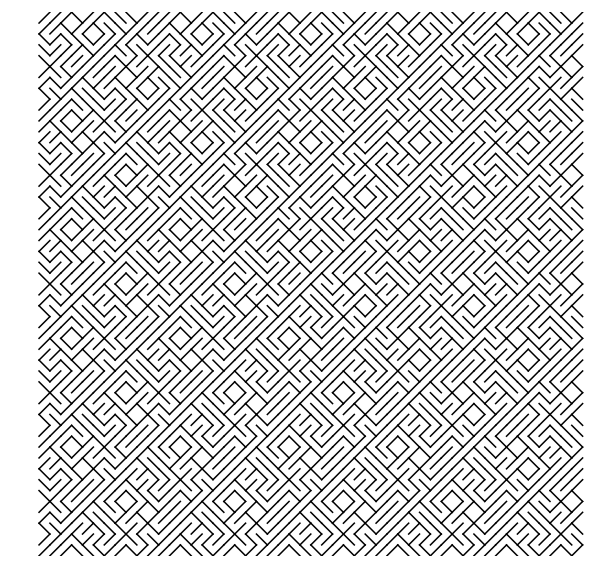

In [6]:
pattern = [0,0,0,0,1,1,1,0,0,1]
sizepattern = len(pattern)

fig=plt.figure(1, figsize = (10,10) )
ax =plt.subplot(1, 1, 1)
for i in range(size):
    for j in range(size):
        if pattern[int(maze[i,j,1] % sizepattern)] == 0:
            plt.plot([i,i+1],[j,j+1],'k')
        else:
            plt.plot([i,i+1],[j+1,j],'k')
ax.axis('equal')
plt.xlim([0,size])
plt.ylim([0,size])
plt.axis('off')
plt.savefig('Pattern'+str(pattern)+'size'+str(size)+'.pdf', format='pdf')
plt.show()

In [30]:
name = []
for i in range(sizepattern):
    name += str(pattern[i])
print(name)

test = str(pattern)
print(test.strip('[]'))
test2 = test.strip('[]')
print(test2.strip(','))

print(''.join(test))

['0', '0', '0', '1', '1']
0, 0, 0, 1, 1
0, 0, 0, 1, 1
[0, 0, 0, 1, 1]


In [6]:
sum = 0
for i in range(sizepattern):
    sum += pattern[i]*10**(sizepattern-i-1)
print(sum)

11


In [26]:
 if count != 0:
        if dire == 0:                             #Check up
            if y-1 >= 0:                          #Check border of matrix
                if maze[x-1,y-1,1] != 0: y -= 1   #Check next position
                else: 
                    x -= 1
                    dire += 1
                move = True
            else: check == False
        if dire == 1 and move == False:            
            if x-1 >= 0:
                if maze[x-1,y+1,1] != 0: x -= 1   #Check left
                else:
                    y += 1
                    dire += 1
                move = True
            else: check == False
        if dire == 2 and move == False:            #Check down
            if y+1 < size:
                if maze[x+1,y+1,1] != 0: y += 1
                else:
                    x += 1
                    dire += 1
                move = True
            else: check == False
        if dire == 3 and move == False:            #Check right
            if x+1 < size:
                if maze[x+1,y-1,1] != 0: x += 1
                else:
                    y += 1
                    dire = 0
            else: check == False

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 4., 5., 0., 0., 0.],
       [0., 0., 0., 0., 2., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def rotated(array_2d):
    list_of_tuples = zip(*array_2d[::-1])
    return [list(elem) for elem in list_of_tuples]
    # return map(list, list_of_tuples)
    
rotated(maze[:,:,1])